# Check the segment length from KO and WT

In [15]:
from datasets import Dataset
from param import *
from util import segment

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   

datalist = ParamDir().data_path_list

In [25]:
segment_len = []
for data_dir in datalist: # a wild-type mouse
    mouse_type = "WT"
    if "KO" in str(data_dir): mouse_type = "KO"

    dataset = Dataset(data_dir, 1.0, False)

    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(10, .8)
    segment_ind = segment(y_train)

    segment_len.append((segment_ind[0]+1, mouse_type))
    for i in range(1, len(segment_ind)):
        segment_len.append((segment_ind[i]-segment_ind[i-1], mouse_type))

In [27]:
df = pd.DataFrame(segment_len, columns=["length", "mouse type"])

<AxesSubplot:xlabel='mouse type', ylabel='length'>

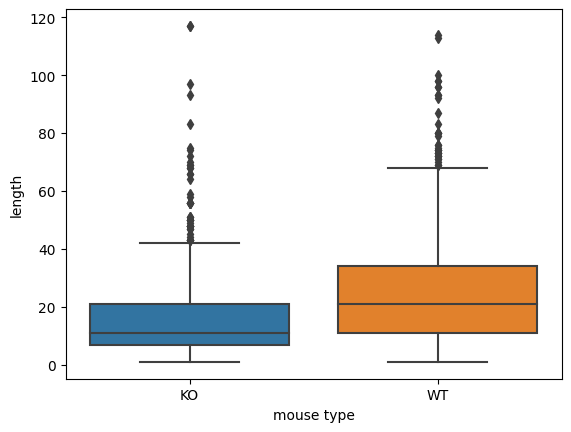

In [28]:
sns.boxplot(x="mouse type", y="length", data=df)

In [33]:
df.groupby("mouse type").mean()

,length
mouse type,
KO,16.034898
WT,25.446400


<AxesSubplot:xlabel='length', ylabel='Count'>

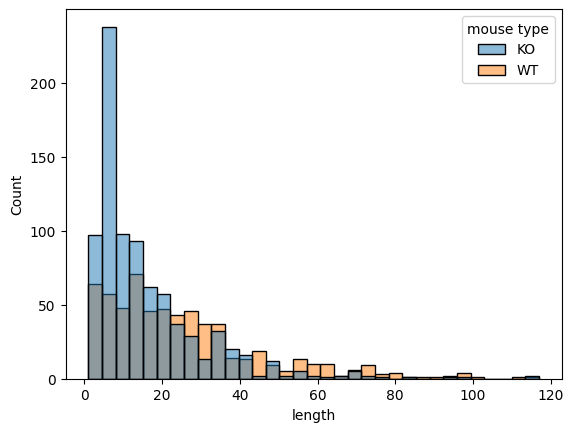

In [32]:
sns.histplot(x="length", data=df, hue="mouse type")